In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
import statsmodels.api as sm
import warnings 
warnings.filterwarnings("ignore")


In [39]:
#we have 548 rows with 2 columns data. 
#data is  about US candy monthly production from 1972 to 2017. 
#IPG3113N is Nondurable Goods: Sugar and confectionery product


In [40]:
data=pd.read_csv("d://candy_production.csv")

data

,observation_date,IPG3113N
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100
...,...,...
543,2017-04-01,107.4288
544,2017-05-01,101.9209
545,2017-06-01,104.2022
546,2017-07-01,102.5861


In [41]:
#Here we can see the data where we have got a column on observation_date and IPG3113N column.
#Right now, we have values in our **observation_date** ’s column in string objects. 
#We will be required to change it on the DateTime object, and also we need to make it our index column.
#In the next step, I am changing the data according to the requirement.

#the basic data preprocessing with our data.

                # - -Checking the null values in the data""")

In [42]:
data.index = pd.to_datetime(data['observation_date'])
data.drop(columns='observation_date',inplace=True)

print("number of missing value in data",data.isna().sum())

number of missing value in data IPG3113N    0
dtype: int64


In [43]:
#Here, by the visualization only, we can see the availability of the seasonality in the data set.
#In the graph, we can see that the magnitude of the production is changed repeatedly,
#showing the changes almost similar for different time intervals.

<AxesSubplot:xlabel='observation_date'>

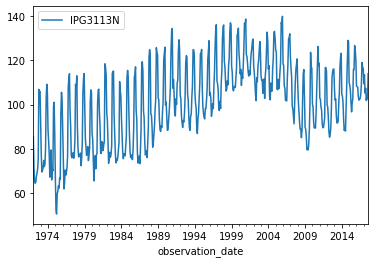

In [44]:
data.plot()





In [45]:
#Four kinds of components help make a time series, 
#and also they can affect our time series analysis if present in excess.
#So here, for this time series, we need to check more for the availability of components.

#Decomposing the time series

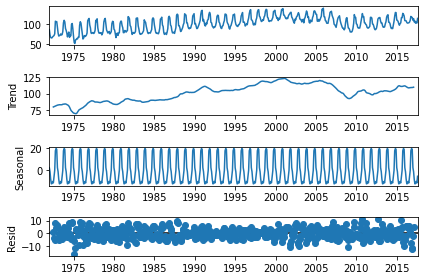

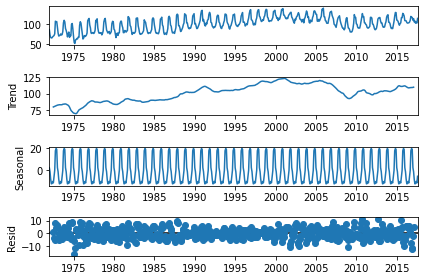

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(data, model="additive")
decompose_data.plot()

In [47]:
#Plotting ACF and PACF graph for understanding

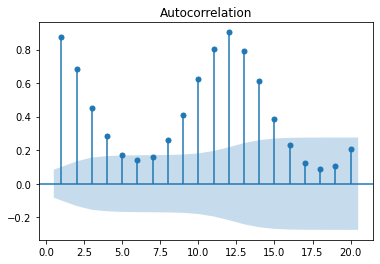

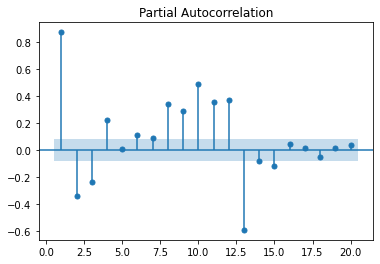

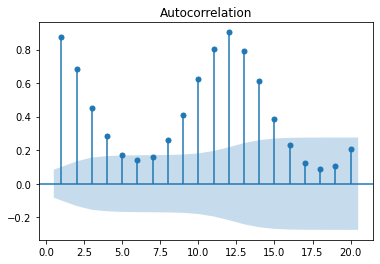

In [48]:
sgt.plot_pacf(data,lags=20, zero=False,method='ols')
sgt.plot_acf(data,lags=20,zero=False)

In [49]:
#we can see that the range of trend and residual is nominal, 
#or we can say that trend is having variation between 75 to 125 and most of the time residual is having the variation around.
#But for the seasonality, we can see that it varies between-10 to 20, which is a high difference range.

#We can also extract the plot of the season for proper visualization of the seasonality.""")

<AxesSubplot:xlabel='observation_date'>

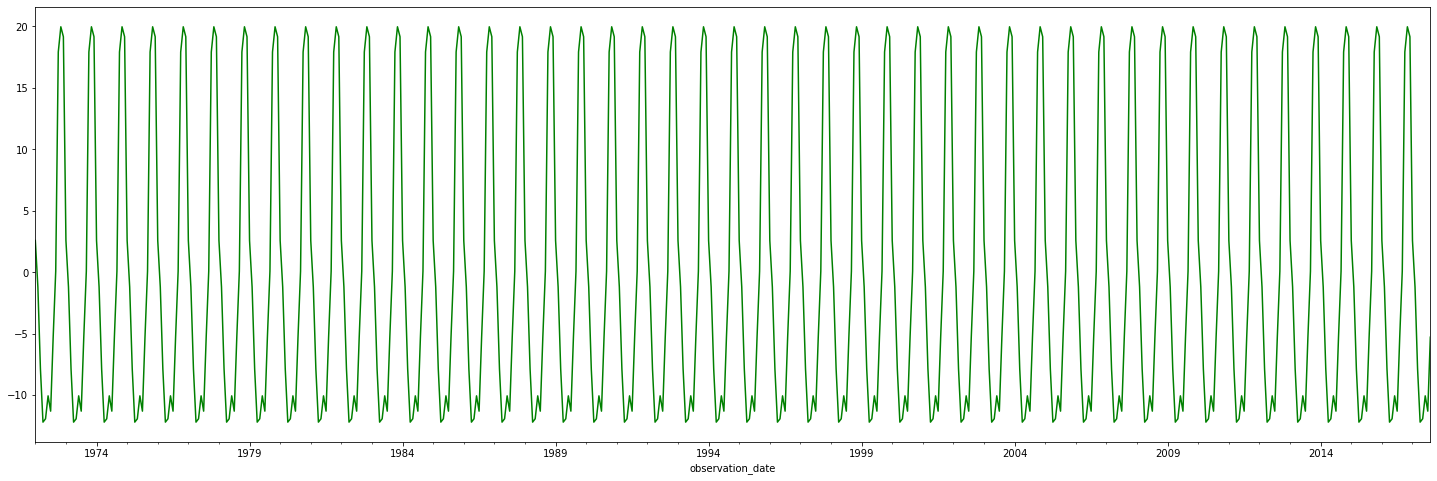

In [50]:
seasonality=decompose_data.seasonal
seasonality.plot(color='green',figsize=(25,8))

In [51]:
#To know more about the time series stationarity,we can perform the ADfuller test,
#a test based on hypothesis, where if the p-value is less than 0.05, 
#then we can consider the time series is stationary, and if the P-value is greater than 0.05, 
#then the time series is non-stationary.

#Performing the adfuller test on data.""")

In [52]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data.IPG3113N, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -1.8870498112252763
2. P-Value :  0.3381775973004313
3. Num Of Lags :  14
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 533
5. Critical Values :
	 1% :  -3.442678467240966
	 5% :  -2.8669778698997543
	 10% :  -2.5696661916864083


In [53]:
#we can see that the p-value is higher for our dataset, and
#we can say that the evidence of the null hypothesis is low;#
#hence the time series is non-stationary.
#We can make the time series stationary with differencing methods.
#In this case, we are going ahead with the rolling mean differencing methods

<AxesSubplot:title={'center':'original'}, xlabel='observation_date'>

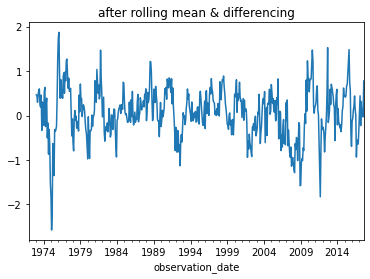

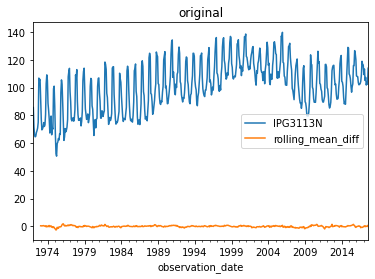

In [54]:
rolling_mean = data.rolling(window = 12).mean()
data['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
data['rolling_mean_diff'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
data.plot(title='original')



In [55]:
# we can see in the graph the seasonality of before the differencing and after the differencing.
#We can see that we have reduced a lot of seasonality.
#We can also proceed for adfuller test where we can compare the p-value

In [56]:
dftest = adfuller(data['rolling_mean_diff'].dropna(), autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
  print("\t",key, ": ", val)

1. ADF :  -4.98981979036685
2. P-Value :  2.3246095576918434e-05
3. Num Of Lags :  19
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 516
5. Critical Values :
	 1% :  -3.443086684769254
	 5% :  -2.867157550015396
	 10% :  -2.5697619453458325


In [57]:
model=auto_arima(data['IPG3113N'],trace=True, error_action='ignore', suppress_warnings=True)
model.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3878.029, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3962.661, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3926.514, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3936.636, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3960.679, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3888.578, Time=0.21 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3642.217, Time=0.77 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3723.758, Time=0.40 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3640.075, Time=1.01 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3785.274, Time=0.44 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=3779.890, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  548
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -1813.231
Date:                Wed, 19 Jan 2022   AIC                           3638.461
Time:                        14:37:57   BIC                           3664.288
Sample:                             0   HQIC                          3648.556
                                - 548                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7160      0.008    217.486      0.000       1.701       1.731
ar.L2         -0.9818      0.009   -115.130      0.000      -0.999      -0.965
ma.L1         -2.0348      0.041    -49.677      0.000      -2.115      -1.954
ma.L2          1.4040      0.078     18.041      0.000       1.251       1.557
ma.L3         -0.2592      0.044     -5.908      0.000      -0.345      -0.173
sigma2        44.1408      2.409     18.327      0.000      39.420      48.862
===================================================================================
Ljung-Box (L1) (Q):                   1.84   Jarque-Bera (JB):                81.76
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):               0.40   Skew:                             0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='observation_date'>

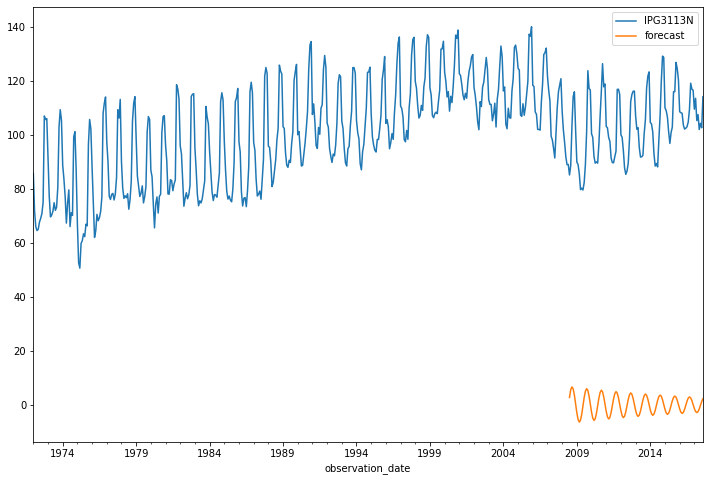

In [58]:
model=ARIMA(data['IPG3113N'],order=(2,1,3))
model_fit=model.fit()
data['forecast']=model_fit.predict(start=int(len(data)*0.8),end=int(len(data)),dynamic=True)
data[['IPG3113N','forecast']].plot(figsize=(12,8))

In [59]:
# Here we can easily see the results we have got by the model is very unsatisfactory. 
#This is because we have fit the model with a non-stationary time series. Without the stationary data, 
#the model is not going to perform well. 

# Next, we are going to apply the model with the data after differencing the time series.

# Fitting and training the mode

<AxesSubplot:xlabel='observation_date'>

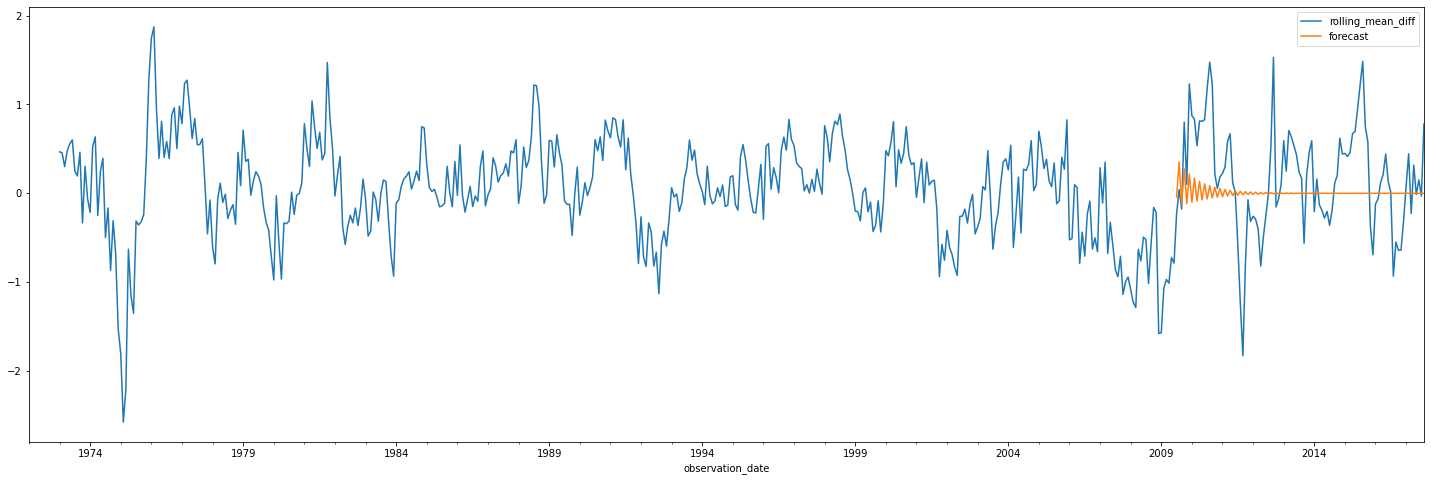

In [60]:
model=ARIMA(data['rolling_mean_diff'].dropna(),order=(2,1,3))
model_fit=model.fit()
data['forecast']=model_fit.predict(start=int(len(data)*0.8),end=int(len(data)),dynamic=True)
data[['rolling_mean_diff','forecast']].plot(figsize=(25,8))

In [61]:
# Here we can see that our forecast is not lying  on the given data and also in all processes we are trying to make predictions on available data and the values are quite satisfying but not the data we used after differencing, which means the values we are going to predict also without the seasonality effect or any other affecting components. So to get rid of the situation, 
#we can use the SARIMAX model. So let’s have an overview of SARIMAX.

<AxesSubplot:>

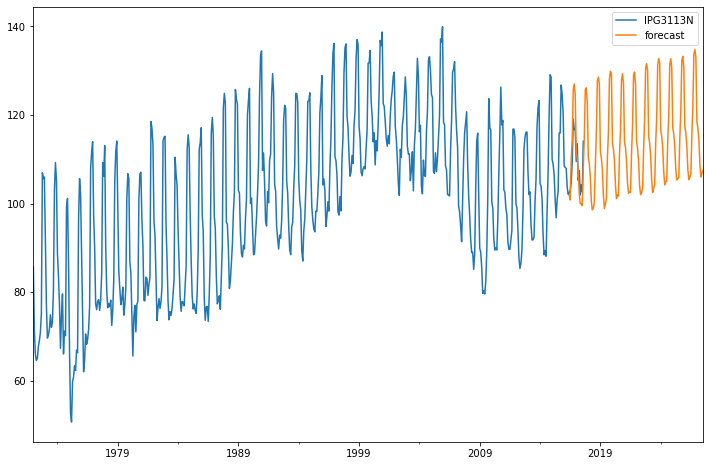

In [67]:
model=sm.tsa.statespace.SARIMAX(data['IPG3113N'],order=(2, 1, 3),seasonal_order=(2,1,3,12))
results=model.fit()
data['forecast']=results.predict(start=int(len(data)*0.8),end=int(len(data)),dynamic=True)
data[['IPG3113N','forecast']].plot(figsize=(12,8))

In [63]:
# in the graph, we can see the results: the forecasting line is almost lying on the given values for this model.
#We didn’t even require the differencing method. 
#Using this model now, we can predict the future values too

In [64]:
from pandas.tseries.offsets import DateOffset
pred_date=[data.index[-1]+ DateOffset(months=x)for x in range(0,120)]
pred_date=pd.DataFrame(index=pred_date[1:],columns=data.columns)
pred_date

,IPG3113N,rolling_mean_diff,forecast
2017-09-01,NaN,NaN,NaN
2017-10-01,NaN,NaN,NaN
2017-11-01,NaN,NaN,NaN
2017-12-01,NaN,NaN,NaN
2018-01-01,NaN,NaN,NaN
...,...,...,...
2027-03-01,NaN,NaN,NaN
2027-04-01,NaN,NaN,NaN
2027-05-01,NaN,NaN,NaN
2027-06-01,NaN,NaN,NaN


In [65]:
# .To make forecasted values, we need to concate this blank data with our production data
# Making the prediction using the model we have created before.




<AxesSubplot:>

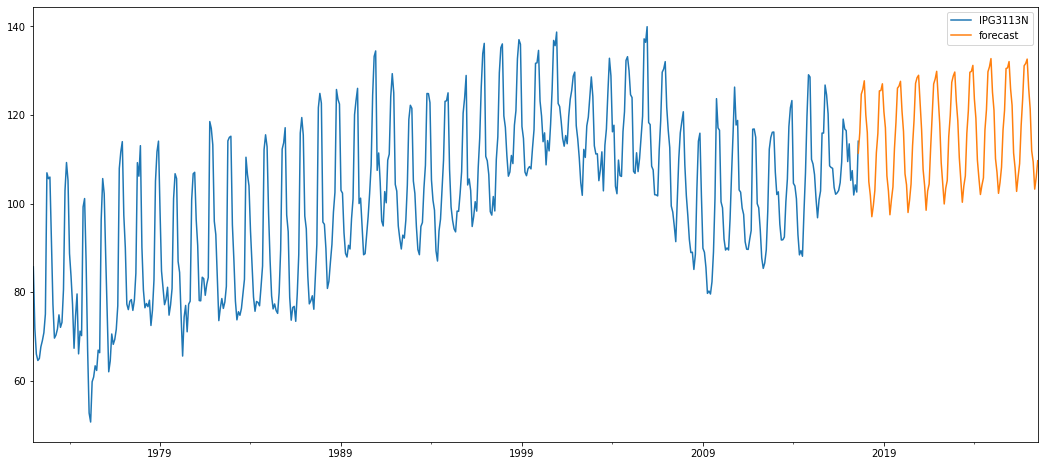

In [66]:
data=pd.concat([data,pred_date])
data['forecast'] = results.predict(start = 547, end =int(len(data)), dynamic= True)  
data[['IPG3113N', 'forecast']].plot(figsize=(18, 8))